<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_0_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.137708,26.485122,78.832640,0.489871,184.945341,184.320269,0.625072
1,0.0,1.0,38.899064,87.519010,92.428646,0.143323,228.990043,228.719005,0.271038
2,0.0,2.0,71.898363,35.237110,87.955612,0.686693,205.777778,204.996608,0.781170
3,0.0,3.0,21.170754,68.011510,78.631041,-0.651855,177.161450,177.530012,-0.368562
4,0.0,4.0,73.936028,73.521153,36.654996,0.630182,194.742359,194.140350,0.602009
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,92.299263,77.651369,28.694183,-0.122516,208.522299,208.484120,0.038179
19996,999.0,16.0,68.479449,56.577785,43.210667,-0.081600,178.186301,178.078654,0.107647
19997,999.0,17.0,95.433643,39.314322,67.776419,-0.360751,212.163633,212.123840,0.039794
19998,999.0,18.0,80.053327,71.354347,97.596260,0.367564,259.371497,258.826196,0.545302


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    69.137708  26.485122  78.832640  0.489871  184.945341   
      1.0    38.899064  87.519010  92.428646  0.143323  228.990043   
      2.0    71.898363  35.237110  87.955612  0.686693  205.777778   
      3.0    21.170754  68.011510  78.631041 -0.651855  177.161450   
      4.0    73.936028  73.521153  36.654996  0.630182  194.742359   
...                ...        ...        ...       ...         ...   
999.0 15.0   92.299263  77.651369  28.694183 -0.122516  208.522299   
      16.0   68.479449  56.577785  43.210667 -0.081600  178.186301   
      17.0   95.433643  39.314322  67.776419 -0.360751  212.163633   
      18.0   80.053327  71.354347  97.596260  0.367564  259.371497   
      19.0   26.125557  60.559947  51.369731 -0.052948  148.002288   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    184.320269  0.625072  
      1.0    228.719005  0.271038  
      2.0    204.996608  0.781170  
      3.0    177.530012 -0.368562  
      4.0    194.140350  0.602009  
...                 ...       ...  
999.0 15.0   208.484120  0.038179  
      16.0   178.078654  0.107647  
      17.0   212.123840  0.039794  
      18.0   258.826196  0.545302  
      19.0   148.050359 -0.048072  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    69.137708  26.485122  78.832640  0.489871  184.945341   
      1.0    38.899064  87.519010  92.428646  0.143323  228.990043   
      2.0    71.898363  35.237110  87.955612  0.686693  205.777778   
      3.0    21.170754  68.011510  78.631041 -0.651855  177.161450   
      4.0    73.936028  73.521153  36.654996  0.630182  194.742359   
...                ...        ...        ...       ...         ...   
999.0 15.0   92.299263  77.651369  28.694183 -0.122516  208.522299   
      16.0   68.479449  56.577785  43.210667 -0.081600  178.186301   
      17.0   95.433643  39.314322  67.776419 -0.360751  212.163633   
      18.0   80.053327  71.354347  97.596260  0.367564  259.371497   
      19.0   26.125557  60.559947  51.369731 -0.052948  148.002288   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    184.320269  0.625072  
      1.0    228.719005  0.271038  
      2.0    204.996608  0.781170  
      3.0    177.530012 -0.368562  
      4.0    194.140350  0.602009  
...                 ...       ...  
999.0 15.0   208.484120  0.038179  
      16.0   178.078654  0.107647  
      17.0   212.123840  0.039794  
      18.0   258.826196  0.545302  
      19.0   148.050359 -0.048072  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.137708,26.485122,78.832640,0.489871,184.945341,184.320269,0.625072
1,0.0,1.0,38.899064,87.519010,92.428646,0.143323,228.990043,228.719005,0.271038
2,0.0,2.0,71.898363,35.237110,87.955612,0.686693,205.777778,204.996608,0.781170
3,0.0,3.0,21.170754,68.011510,78.631041,-0.651855,177.161450,177.530012,-0.368562
4,0.0,4.0,73.936028,73.521153,36.654996,0.630182,194.742359,194.140350,0.602009
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,92.299263,77.651369,28.694183,-0.122516,208.522299,208.484120,0.038179
19996,999.0,16.0,68.479449,56.577785,43.210667,-0.081600,178.186301,178.078654,0.107647
19997,999.0,17.0,95.433643,39.314322,67.776419,-0.360751,212.163633,212.123840,0.039794
19998,999.0,18.0,80.053327,71.354347,97.596260,0.367564,259.371497,258.826196,0.545302


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    69.137708  26.485122  78.832640  0.489871  184.945341   
      1.0    38.899064  87.519010  92.428646  0.143323  228.990043   
      2.0    71.898363  35.237110  87.955612  0.686693  205.777778   
      3.0    21.170754  68.011510  78.631041 -0.651855  177.161450   
      4.0    73.936028  73.521153  36.654996  0.630182  194.742359   
...                ...        ...        ...       ...         ...   
999.0 15.0   92.299263  77.651369  28.694183 -0.122516  208.522299   
      16.0   68.479449  56.577785  43.210667 -0.081600  178.186301   
      17.0   95.433643  39.314322  67.776419 -0.360751  212.163633   
      18.0   80.053327  71.354347  97.596260  0.367564  259.371497   
      19.0   26.125557  60.559947  51.369731 -0.052948  148.002288   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    184.320269  0.625072  
      1.0    228.719005  0.271038  
      2.0    204.996608  0.781170  
      3.0    177.530012 -0.368562  
      4.0    194.140350  0.602009  
...                 ...       ...  
999.0 15.0   208.484120  0.038179  
      16.0   178.078654  0.107647  
      17.0   212.123840  0.039794  
      18.0   258.826196  0.545302  
      19.0   148.050359 -0.048072  

[20000 rows x 7 columns]

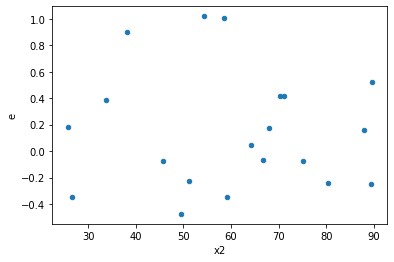

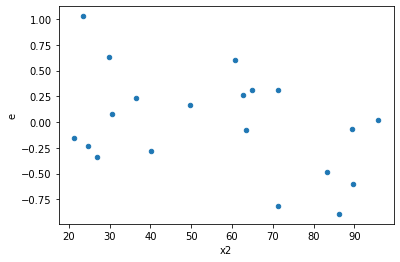

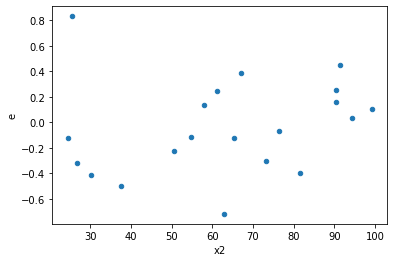

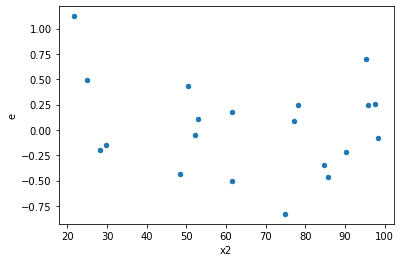

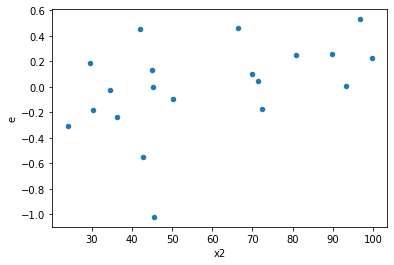

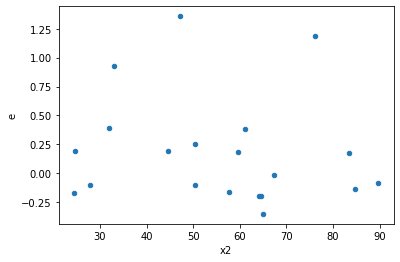

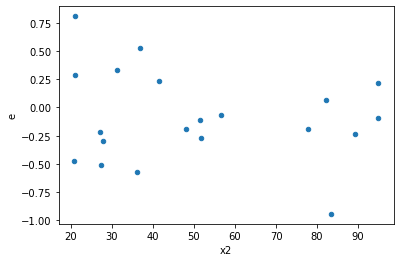

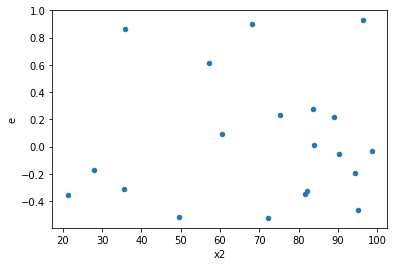

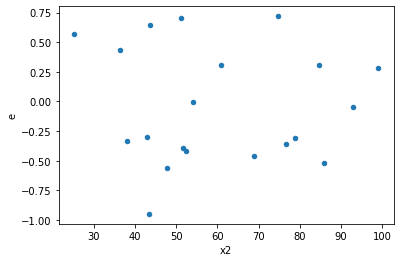

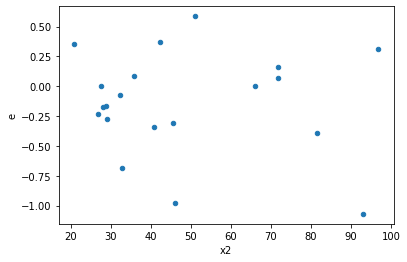

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,2.0,12.0,0.3953180678283644,2.4892360959130455,0.1976590339141822,0.20743634132608713,1.0494655226138057,0.7603268948303492,0.6198365525848254,0.3801634474151746,Reject005=1 : Homoscedasticity
5.0,9.0,5.0,1.2422669701383897,0.7436126213349723,0.13802966334870997,0.14872252426699445,1.0774678475544106,0.9885295824893261,0.505735208755337,0.49426479124466305,Reject005=1 : Homoscedasticity
8.0,6.0,8.0,0.3301764300614553,2.58770576429863,0.05502940501024255,0.32346322053732873,5.878006867003613,0.02548724408723757,0.9872563779563812,0.012743622043618785,Reject005=0 : Heteroscedasticity
9.0,2.0,12.0,0.14851850532361038,3.2778553007285254,0.07425925266180519,0.27315460839404376,3.6783915620327705,0.11353202045720967,0.9432339897713952,0.056766010228604835,Reject005=1 : Homoscedasticity
10.0,10.0,4.0,1.7161672917756547,0.7917989712315197,0.17161672917756549,0.1979497428078799,1.1534408315349527,0.9675063410813385,0.5162468294593308,0.48375317054066924,Reject005=1 : Homoscedasticity
11.0,5.0,9.0,0.43609235579556116,1.4797118394530386,0.08721847115911223,0.16441242660589317,1.885064303706452,0.38513611536906067,0.8074319423154697,0.19256805768453034,Reject005=1 : Homoscedasticity
13.0,2.0,12.0,0.01880139639758817,2.7234722821031006,0.009400698198794084,0.2269560235085917,24.142464603076554,0.0001244127645243509,0.9999377936177378,6.220638226217545e-05,Reject005=0 : Heteroscedasticity
15.0,2.0,12.0,0.10824066956915368,2.5914245488787486,0.05412033478457684,0.2159520457398957,3.990220064223208,0.093861430374645,0.9530692848126775,0.0469307151873225,Reject005=1 : Homoscedasticity
16.0,8.0,6.0,0.5667933188744337,1.0906446441670297,0.07084916485930422,0.1817741073611716,2.5656492595522846,0.26729244502147065,0.8663537774892647,0.13364622251073532,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,2.0,12.0,0.3953180678283644,2.4892360959130455,0.1976590339141822,0.20743634132608713,1.0494655226138057,0.7603268948303492,Reject005=1 : Homoscedasticity
1.0,3.0,11.0,0.2584801266793124,0.5106297546238235,0.08616004222643747,0.046420886783983956,0.5387751164511396,0.6691034371843114,Reject005=1 : Homoscedasticity
2.0,10.0,4.0,3.4110069937978134,0.9819453345678026,0.3411006993797813,0.24548633364195066,0.7196887432019784,0.6113373618673502,Reject005=1 : Homoscedasticity
3.0,5.0,9.0,1.0925721724808193,0.5923067868593317,0.21851443449616387,0.06581186520659241,0.30117857137601484,0.19956339284461372,Reject005=1 : Homoscedasticity
4.0,10.0,4.0,2.9093235240364637,0.29900575724113854,0.29093235240364634,0.07475143931028463,0.25693752754789106,0.07402946524150353,Reject005=1 : Homoscedasticity
5.0,9.0,5.0,1.2422669701383897,0.7436126213349723,0.13802966334870997,0.14872252426699445,1.0774678475544106,0.9885295824893261,Reject005=1 : Homoscedasticity
6.0,8.0,6.0,2.1829333296042446,0.4685192812347644,0.27286666620053057,0.07808654687246074,0.28617107380596896,0.10628881578058073,Reject005=1 : Homoscedasticity
7.0,9.0,5.0,1.0132522645411086,0.25512727799828705,0.11258358494901206,0.05102545559965741,0.45322287101415637,0.2854513349205779,Reject005=1 : Homoscedasticity
8.0,6.0,8.0,0.3301764300614553,2.58770576429863,0.05502940501024255,0.32346322053732873,5.878006867003613,0.02548724408723757,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      808
Reject005=0 : Heteroscedasticity    192
Name: Result_test, dtype: int64